In [4]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [5]:
import warnings
warnings.filterwarnings('ignore')

# Validation Strategy

The validation strategy is one of the most important steps in machine learning. If one fails to effectivelly validate your machine learning model, the results may be unexpectedly bad.

The idea is to create steps that will help you make a good estimate of your error on data as it will come in real life. We've seen that:
- if your model is too complex, it may memorize your training data (high bias)
- if your model is too simple, you'll have performance problems (high variance)

If your model memorizes your training data, you'll probably obtain a good performance score on your data, but when real data comes to you, you'll lose performance. We say that the model didn't `GENERALIZE` the patterns to unseen data. It means your error estimates were wrong. What can we do to avoid that?

We can simulate what real life would look like. For example, one strategy is to hide some data from your model, to check its reliability on this never-seen data.

## Hold-Out

The idea of the hold-out is to hide a part of the dataset and use it to test your model performance. The errors measured on your `Test set` will be a better estimate of the model performance in real life.

An important observation is that your model may be performing fairly well on your `Training Set`, but your `Test Set` performance may be poor. This may indicate your model is memorizing your data. 

There are several things that can be happening if you observe that your model is performing much better on the `Training data` than in your `Test data`.

- Model is too complex
    - solution: use a strategy to penalize model complexity if it doesn't bring much gain (regularization)
    
- Data Leakage
    - you may be using some information that you shouldn't have in your training. Information from the future. 

In [6]:
tb_auto = pd.read_csv('data/tb_autompg.csv', na_values='?')
tb_auto = tb_auto.dropna()

In [7]:
tb_auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


In [8]:
tb_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [9]:
tb_auto.columns = [col.replace(' ', '_') for col in tb_auto.columns]

In [10]:
tb_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


## EDA

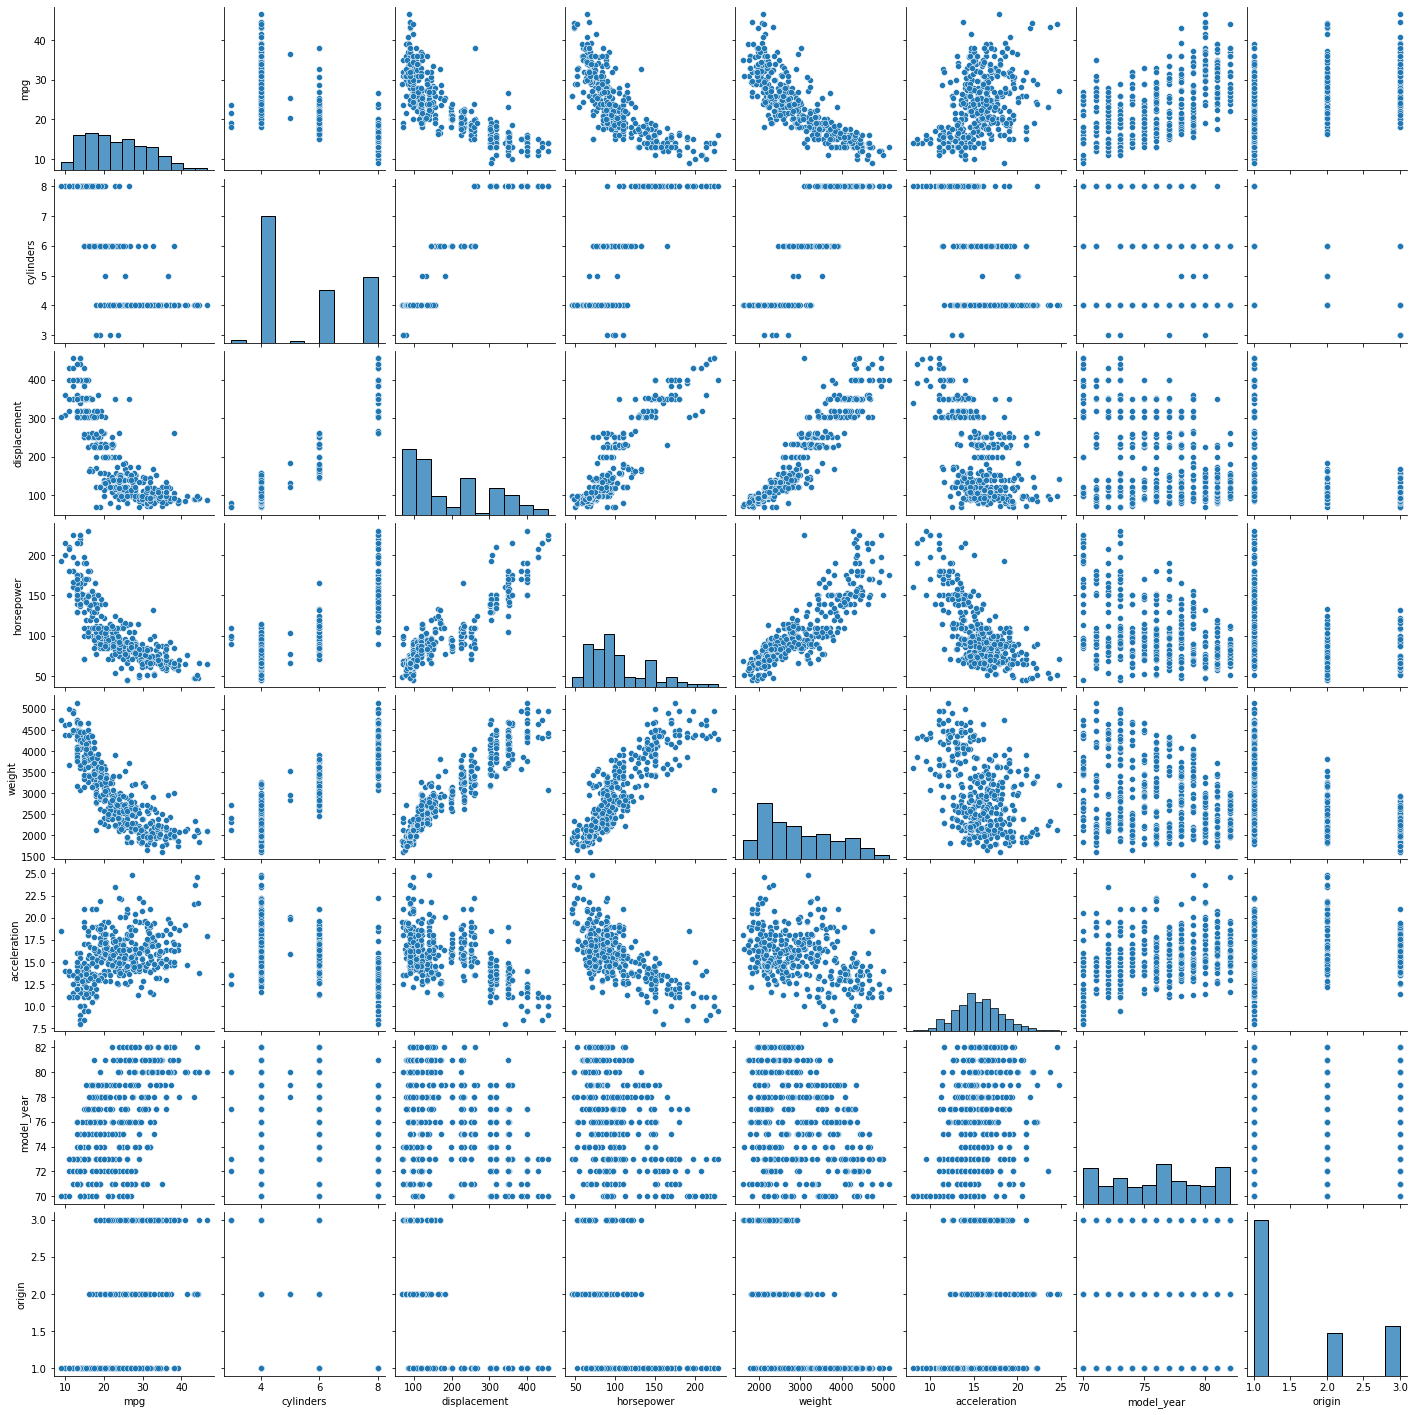

In [11]:
sns.pairplot(tb_auto)

In [12]:
tb_auto['log_weight'] = np.log(tb_auto['weight'])
tb_auto['log_horsepower'] = np.log(tb_auto['horsepower'])
tb_auto['log_displacement'] = np.log(tb_auto['displacement'])
X_eda = tb_auto.drop(['mpg', 'car_name', 'weight', 'horsepower', 'displacement'], axis = 1)

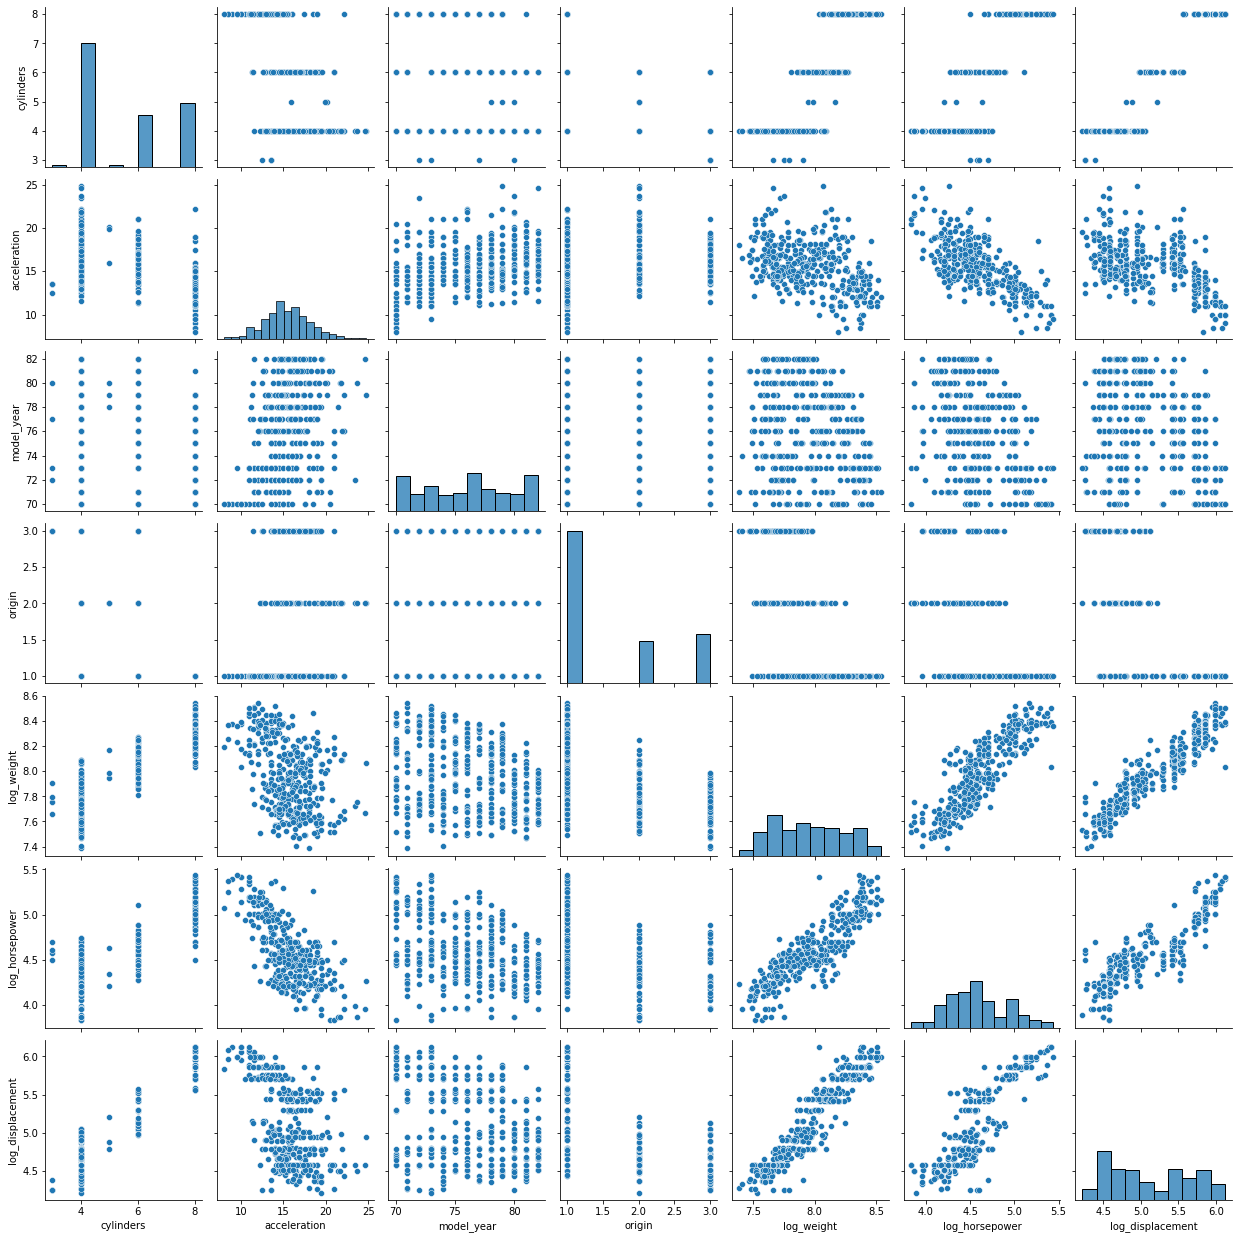

In [16]:
sns.pairplot(X_eda)

In [18]:
scaler = StandardScaler().fit(X_eda)
X_eda_norm = scaler.transform(X_eda)
X_eda_norm

array([[ 1.48394702, -1.285258  , -1.62531533, ...,  0.72098615,
         0.81531045,  1.12582874],
       [ 1.48394702, -1.46672362, -1.62531533, ...,  0.90804741,
         1.51050669,  1.37222324],
       [ 1.48394702, -1.64818924, -1.62531533, ...,  0.65120518,
         1.23258633,  1.1919992 ],
       ...,
       [-0.86401356, -1.4304305 ,  1.63640964, ..., -0.78583239,
        -0.45813933, -0.41843975],
       [-0.86401356,  1.11008813,  1.63640964, ..., -0.30745013,
        -0.63708852, -0.63983046],
       [-0.86401356,  1.40043312,  1.63640964, ..., -0.18086132,
        -0.52840675, -0.65555983]])

In [19]:
pca_auto = PCA()
pca_auto.fit(X_eda_norm)
pca_eda = pca_auto.transform(scaler.transform(X_eda))

In [21]:
pca_eda.shape

(392, 7)

In [22]:
['PC' + str(i) for i in range(pca_eda.shape[1])]

['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']

In [23]:
tb_pca_eda = pd.DataFrame(pca_eda, columns = ['PC' + str(i) for i in range(pca_eda.shape[1])])
tb_pca_eda['mpg'] = tb_auto['mpg']
tb_pca_eda['log_mpg'] = np.log(tb_pca_eda['mpg'])

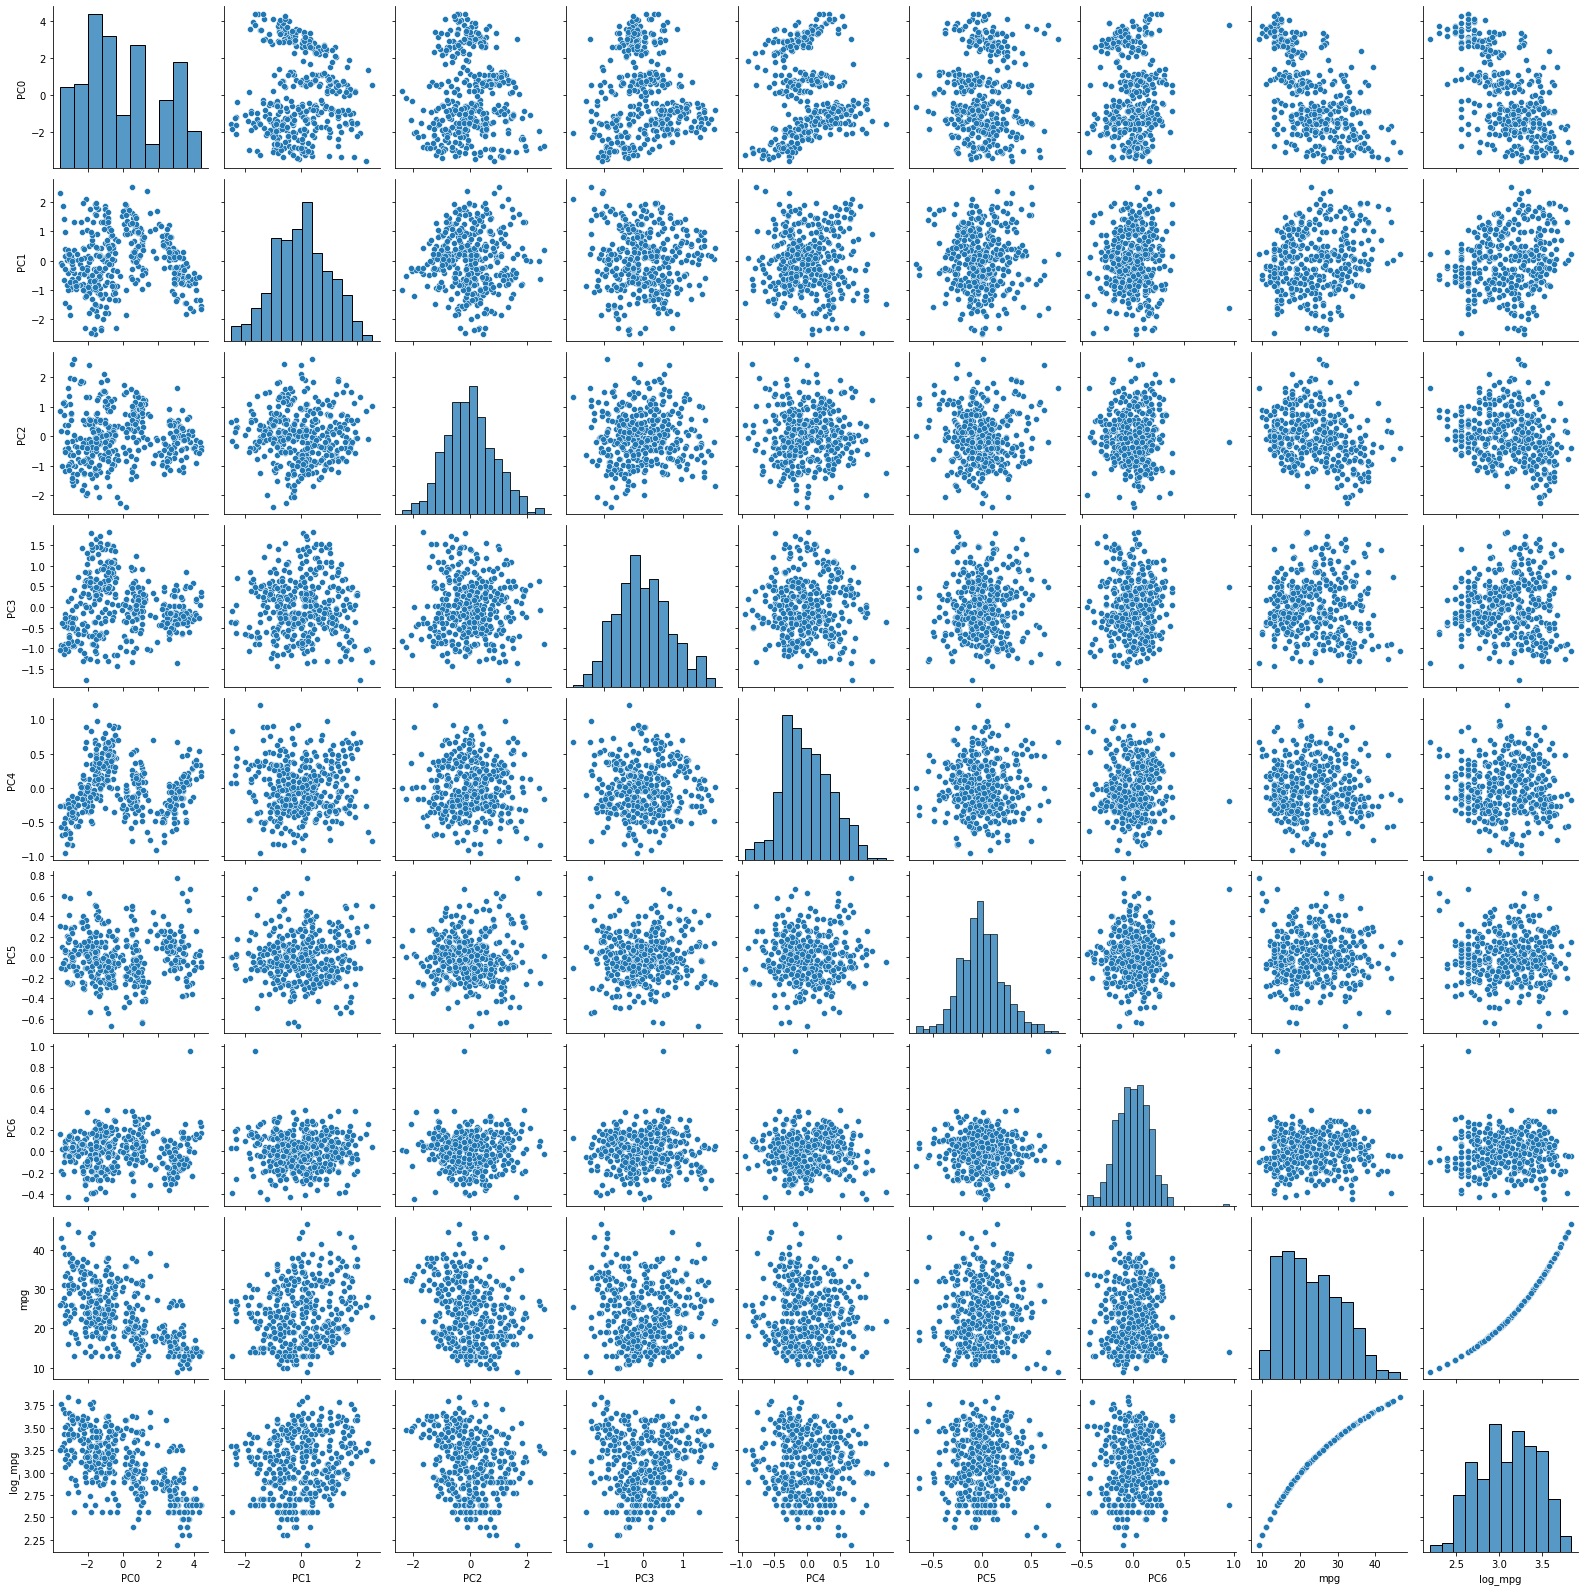

In [24]:
sns.pairplot(tb_pca_eda)

## Holdout in Python

Usually, people tend to separate approximately 20% of the dataset as a test (or holdout) set.

In [25]:
X = tb_pca_eda[['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']]
y = tb_pca_eda['log_mpg']

In [27]:
y

0      2.890372
1      2.708050
2      2.890372
3      2.772589
4      2.833213
         ...   
387    3.637586
388    3.258097
389    3.091042
390    3.465736
391    3.583519
Name: log_mpg, Length: 392, dtype: float64

In [28]:
X['PC0_PC1'] = X['PC0'] * X['PC1']

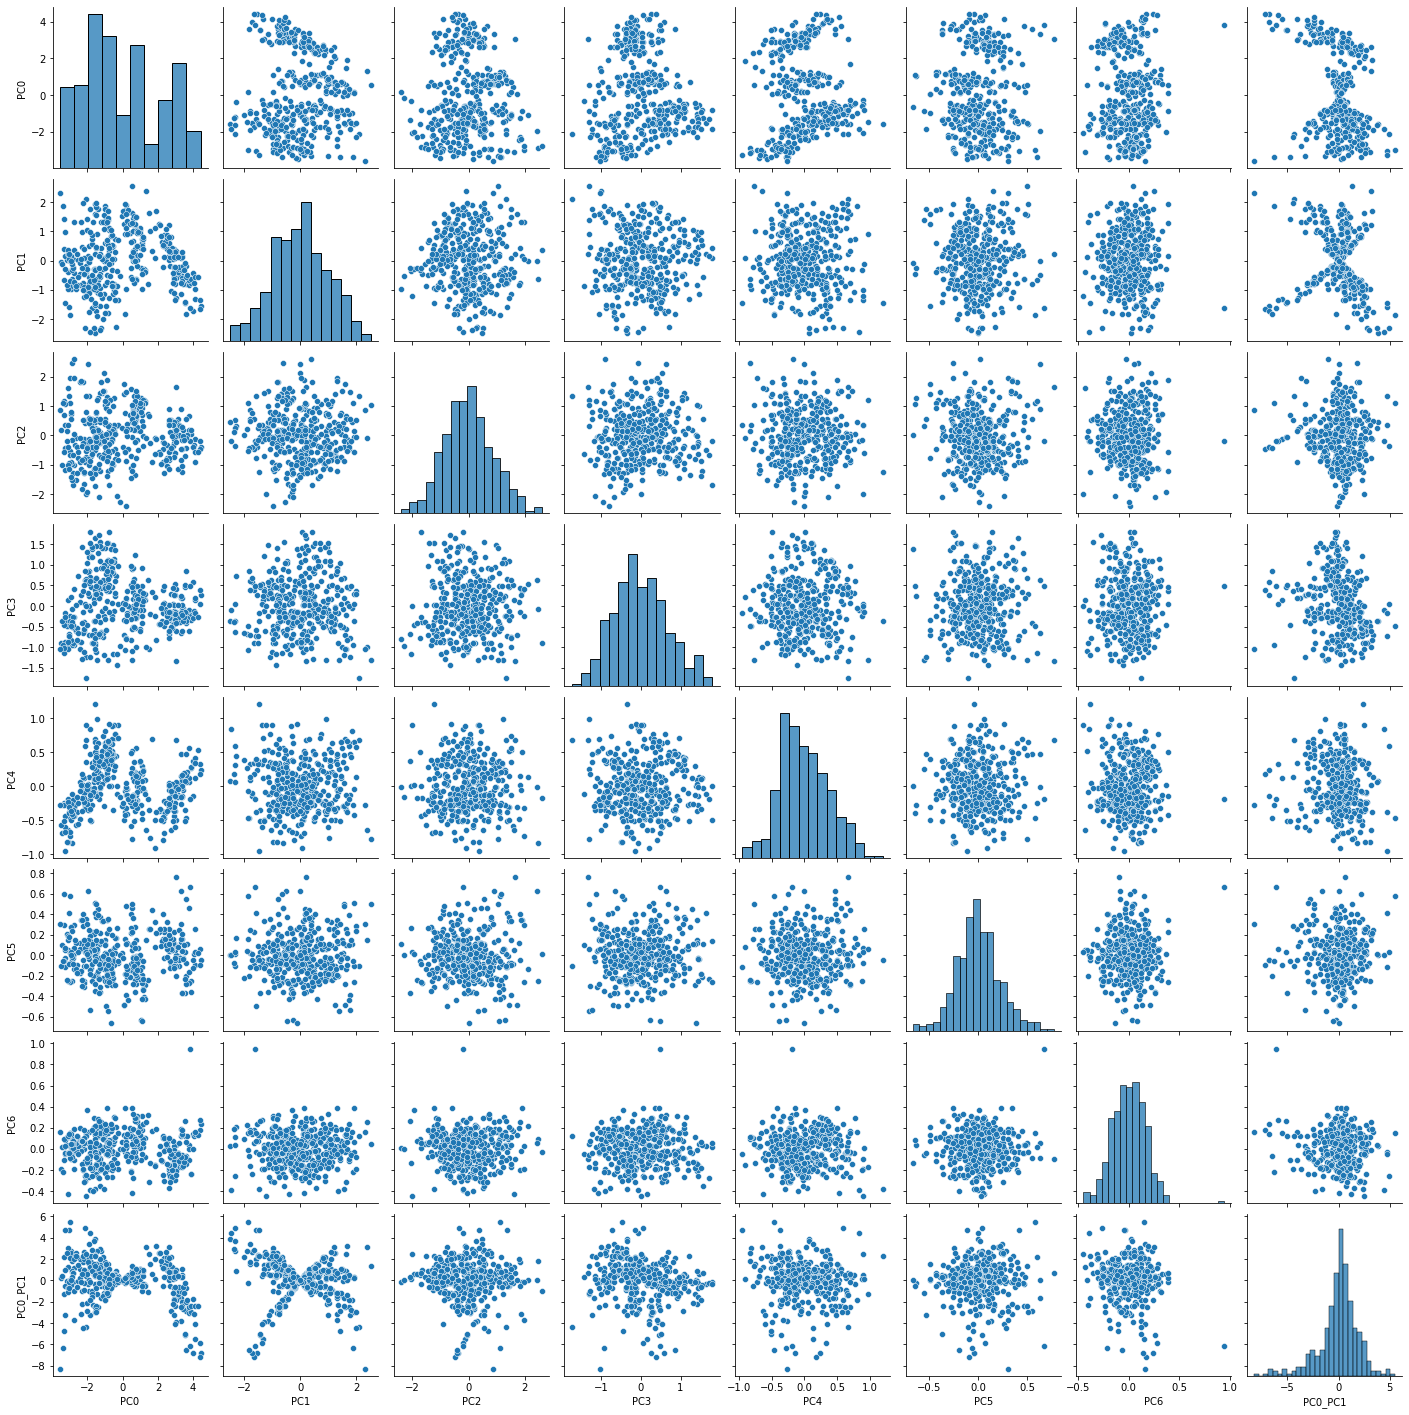

In [31]:
sns.pairplot(X)

Criar interações entre variáveis é um processo tedioso utilizando apenas a biblioteca pandas...

In [30]:
import patsy

In [56]:
tb_pca_eda['CLASSIF_PC0'] = np.where(tb_pca_eda['PC0'] > 1, "Maior1", 
                                     np.where(tb_pca_eda['PC0'] > 0, "Maior0", "Menor0"))

In [57]:
tb_pca_eda['CLASSIF_PC0'].unique()

array(['Maior1', 'Menor0', 'Maior0'], dtype=object)

In [58]:
pd.get_dummies(tb_pca_eda['CLASSIF_PC0'], drop_first=True)

,Maior1,Menor0
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
387,0,1
388,0,1
389,0,1
390,0,1


In [59]:
y, X = patsy.dmatrices('log_mpg ~ PC0 + PC3 * CLASSIF_PC0', data = tb_pca_eda, return_type="dataframe")

In [60]:
X

,Intercept,CLASSIF_PC0[T.Maior1],CLASSIF_PC0[T.Menor0],PC0,PC3,PC3:CLASSIF_PC0[T.Maior1],PC3:CLASSIF_PC0[T.Menor0]
0,1.0,1.0,0.0,2.759873,0.283349,0.283349,0.000000
1,1.0,1.0,0.0,3.309684,0.189658,0.189658,0.000000
2,1.0,1.0,0.0,3.048192,0.421507,0.421507,0.000000
3,1.0,1.0,0.0,2.902717,0.259645,0.259645,0.000000
4,1.0,1.0,0.0,2.975059,0.542413,0.542413,0.000000
...,...,...,...,...,...,...,...
387,1.0,0.0,1.0,-0.863756,0.858624,0.000000,0.858624
388,1.0,0.0,1.0,-3.576598,-1.044919,-0.000000,-1.044919
389,1.0,0.0,1.0,-0.802502,1.807125,0.000000,1.807125
390,1.0,0.0,1.0,-1.514882,0.477212,0.000000,0.477212


In [38]:
print(y)

      log_mpg
0    2.890372
1    2.708050
2    2.890372
3    2.772589
4    2.833213
..        ...
387  3.637586
388  3.258097
389  3.091042
390  3.465736
391  3.583519

[386 rows x 1 columns]


In [61]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [66]:
y_test

,log_mpg
207,2.995732
263,2.873565
142,3.258097
103,2.397895
22,3.218876
...,...
381,3.583519
132,3.218876
111,2.890372
150,3.258097


## Your error should be estimated using the `Test Set`. This will be a better estimate of your true error.

Not only that, you should also calculate the error on your `Training Set` (called `training error`). This will be a good comparison to check whether your results on your `Test Set` (called `test error`) are getting too far from the results on your `Test Set`, which, again, can indicate an overfitting.

## Data Leakage example

In [67]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [68]:
# R2 - correlação entre valores previstos e valores reais
print(model.score(X_test, y_test))

0.3724350578604194


In [69]:
tb_pred_leak = pd.DataFrame({'y_real' : np.exp(y_test['log_mpg'])})
tb_pred_leak['pred'] = np.exp(model.predict(X_test))

In [70]:
tb_pred_leak

,y_real,pred
207,20.0,25.887633
263,17.7,16.813686
142,26.0,30.543221
103,11.0,15.019815
22,25.0,24.951617
...,...,...
381,36.0,21.207071
132,25.0,19.091170
111,18.0,24.638422
150,26.0,20.069674


<AxesSubplot:xlabel='pred', ylabel='y_real'>

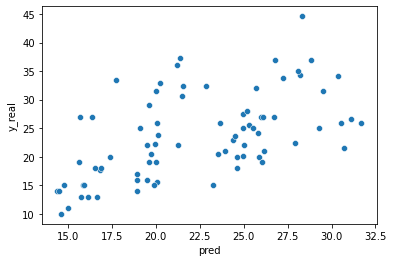

In [71]:
sns.scatterplot(data = tb_pred_leak, x = 'pred', y = 'y_real')

### Algumas medidas de erro

In [72]:
tb_pred_leak['erro_pred'] = tb_pred_leak['y_real'] - tb_pred_leak['pred']

In [74]:
tb_pred_leak

,y_real,pred,erro_pred
207,20.0,25.887633,-5.887633
263,17.7,16.813686,0.886314
142,26.0,30.543221,-4.543221
103,11.0,15.019815,-4.019815
22,25.0,24.951617,0.048383
...,...,...,...
381,36.0,21.207071,14.792929
132,25.0,19.091170,5.908830
111,18.0,24.638422,-6.638422
150,26.0,20.069674,5.930326


#### RMSE

O RMSE é uma medida de erro equivalente ao desvio padrão dos resíduos, ou seja, ele mede o erro de previsão do modelo nas unidades da variável resposta

# VOLTAMOS 14H15

In [75]:
tb_pred_leak['erro_pred2'] = tb_pred_leak['erro_pred'] ** 2

In [82]:
np.mean(tb_pred_leak['erro_pred2'])

39.42898082329019

In [79]:
print(np.sqrt(np.mean(tb_pred_leak['erro_pred'] ** 2)))

6.27925002076603


In [80]:
from sklearn.metrics import mean_squared_error

In [81]:
mean_squared_error(tb_pred_leak['y_real'], tb_pred_leak['pred'])

39.42898082329019

In [83]:
np.sqrt(mean_squared_error(tb_pred_leak['y_real'], tb_pred_leak['pred']))

6.27925002076603

#### RMSPE

Se a nossa variável resposta é positiva (Y > 0) então podemos calcular o erro médio percentual a partir do RMSPE

In [84]:
print(np.sqrt(np.mean((tb_pred_leak['erro_pred']/tb_pred_leak['y_real']) ** 2)))


0.23962960690706409


#### MAPE

O MAPE é uma medida de erro muito utilizada em áreas que realizam previsões de demanda. Ele é semelhante ao RMSPE mas utiliza o valor absoluto (módulo) para corrigir erros negativos.

In [85]:
print(np.mean(abs(tb_pred_leak['erro_pred'])/tb_pred_leak['y_real']))

0.19670786437132362


In [86]:
from sklearn.metrics import mean_absolute_percentage_error

In [87]:
mean_absolute_percentage_error(tb_pred_leak['y_real'], tb_pred_leak['pred'])

0.19670786437132362

**What's wrong with the process above?**

## Solution: the EXACT same steps used to prepare your training data should be used on the new data 


So, you fit the standard scaler on your training data, and don't fit it again on your test data. Effectively, you'll be using the `mean` and `standard deviation` from the StandardScaler as you've seen on your training data (<b>pipelines</b> will soon come to rescue us for that).

In [ ]:
X_pre = tb_auto.drop([+'mpg', 'car_name'], axis = 1)
y_pre = tb_auto['mpg']

In [ ]:
X_train_pre, X_test_pre, y_train_pre, y_test_pre = train_test_split(X_pre, y_pre, test_size = 0.2)

In [ ]:
X_train_pre['log_weight'] = np.log(X_train_pre['weight'])
X_train_pre['log_horsepower'] = np.log(X_train_pre['horsepower'])
X_train_pre['log_displacement'] = np.log(X_train_pre['displacement'])
X_train_pre = X_train_pre.drop(['weight', 'horsepower', 'displacement'], axis = 1).copy()
X_train_pre.describe()
scaler = StandardScaler().fit(X_train_pre)
pca_auto = PCA()
pca_auto.fit(scaler.transform(X_train_pre))
pca_train = pca_auto.transform(scaler.transform(X_train_pre))
tb_X_pca_train = pd.DataFrame(pca_train, columns = ['PC' + str(i) for i in range(pca_train.shape[1])])

In [ ]:
X_train = patsy.dmatrix(' ~ PC0 + PC1 + PC2', data = tb_X_pca_train, return_type="dataframe")
y_train = np.log(y_train_pre)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
X_test_pre['log_weight'] = np.log(X_test_pre['weight'])
X_test_pre['log_horsepower'] = np.log(X_test_pre['horsepower'])
X_test_pre['log_displacement'] = np.log(X_test_pre['displacement'])
X_test_pre = X_test_pre.drop(['weight', 'horsepower', 'displacement'], axis = 1).copy()
X_test_pre.describe()

In [ ]:
pca_test = pca_auto.transform(scaler.transform(X_test_pre))
tb_X_pca_test = pd.DataFrame(pca_test, columns = ['PC' + str(i) for i in range(pca_test.shape[1])])

In [ ]:
X_test = patsy.dmatrix(' ~ PC0 + PC1 + PC2', data = tb_X_pca_test, return_type="dataframe")
y_test = np.log(y_test_pre)

In [ ]:
tb_pred_test = pd.DataFrame({'y_real' : y_test_pre, 'pred' : np.exp(model.predict(X_test))})
tb_pred_test['erro_pred'] = tb_pred_test['y_real'] - tb_pred_test['pred']

In [ ]:
sns.scatterplot(data = tb_pred_test, x = 'pred', y = 'y_real')

In [ ]:
print(f"RMSE: {np.sqrt(np.mean(tb_pred_test['erro_pred'] ** 2))}")
print(f"RMSE: {np.sqrt(np.mean((tb_pred_leak['erro_pred']/tb_pred_leak['y_real']) ** 2))}")

In [115]:
alunos_dedicados = ['lara', 'andres', 'igor', 'joao']
#tema_aleatorio = [1, 2, 3, 4, 5, 6, 8, 9, 10,11, 12, 13, 14, 15]

In [100]:
import random
# Escolhendo alunos aleatoriamente
def escolher_aleatório(set_alunos):
    escolhido = random.choice(set_alunos)
    set_alunos.remove(escolhido)
    print(escolhido)

In [122]:
escolher_aleatório(alunos_dedicados)

lara


In [123]:
escolher_aleatório(tema_aleatorio)

9


In [124]:
alunos_dedicados

[]